# Digits Menge erzeugen

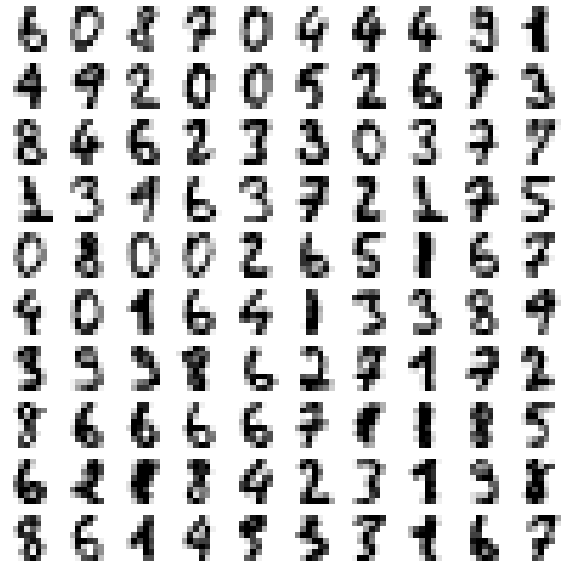

In [3]:
from sklearn.datasets import load_digits
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np

# Handschriftenerkennung laden
X, y = load_digits(return_X_y=True)
images = X[np.random.choice(len(X), 100, replace=False)]

# Bilder anzeigen
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
ax = axes.ravel()
for i, image in enumerate(images):
    ax[i].imshow(1 - image.reshape([8, 8]), cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()
plt.show()


# Neuronales Netzwerk trainieren

In [5]:
import csv
from neural_network import NeuralNetwork
from random import shuffle

with open('digits.csv', 'r') as digits_file:
    reader = csv.reader(digits_file, quoting=csv.QUOTE_NONNUMERIC)
    digits = list(reader)
shuffle(digits)
network = NeuralNetwork(64, 256, 10, learning_rate=0.005)
x_test, y_test, x_train, y_train = network.prepare(digits, test_ratio=0.1)
for i in range(300):
    network.train(x_train, y_train)
correct, percent = network.predict(x_test, targets=y_test)
print(f"{correct} korrekte Vorhersagen ({percent}%).")


163 korrekte Vorhersagen (91.06145251396647%).


## Nun ein Bild nehmen

In [70]:
image = X[np.random.choice(len(X), 1, replace=False)]
image[0]

array([ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,
        0.,  9.,  5.,  0.,  0., 14., 10.,  0.,  7., 16.,  4.,  0.,  5.,
       16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16., 16., 14.,  0.,
        0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
       16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.])

In [71]:
a = np.array(image[0])
data=a.reshape((8, -1))
data

array([[ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  0.,  0.,  9.,  5.],
       [ 0.,  0., 14., 10.,  0.,  7., 16.,  4.],
       [ 0.,  5., 16.,  7.,  5., 16.,  6.,  0.],
       [ 0., 11., 16., 16., 16., 14.,  0.,  0.],
       [ 0.,  3.,  4., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.]])

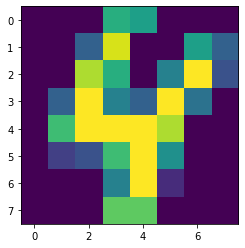

In [72]:
plt.imshow(data, interpolation='none')
plt.show()

# Vorhersage des neuronalen Netzwerkes

In [73]:
network.predict(image)

[4.0]